# Part 1: Stats and Data

Problem: You want to try to determine who is going to win an upcoming election.  To do so, you’re going to poll some number of people to try to estimate the probability a given voter supports Candidate A over Candidate B (we will assume no one is indifferent between them).

#### 1)  If  the  probability  a  person  supports  Candidate A is p,  how  many  people  should  you  poll  to  try  to  be  95% confident you know the value of p to within an error of 0.01?

We have a random variable X~Bern(p) that represents the likelihood that a person will vote for candidate A, depending on i.i.d. RVs X1, X2, ... Xn. We're interested in the probability that the difference between sample mean X bar n and the true value of p is below a certain threshold, i.e. 0.01 in this case. So, we can use the Hoeffding inequality, and set the upper bound of failure to be less than 5%.

P(|X bar n - p| >= ep) <= 2e^(-2N(ep)^2) <br />
P(|X bar n - p| >= 0.01) <= 0.05 <br />
2e^(-2N(0.01)^2) <= 0.05 <br />
-2N(0.01)^2 <= ln(0.025) <br />
-0.0002N <= ln(0.025) <br />
N >= ln(0.025)/-0.0002 = 18444.39 <br />

We should try to poll at least 18445 people to be 95% confident we know p to within an error of 1%.

#### 2)  What if you can only afford to poll k = 30 people - how accurately can you say you know p (i.e., what error do you know p to) with 95% confidence?

Once again, we can use the Hoeffding inequality, with N=30 and the right hand side being 0.05.<br /> <br />
P(|X bar n - p| >= ep) <= 2e^(-2N(ep)^2) <br />
P(|X bar 30 - p| >= ep) <= 0.05 <br />
2e^(-2* 30*(ep)^2) <= 0.05 <br />
-60(ep)^2 <= ln(0.025) <br />
ep^2 >= 0.06148 <br />
ep >= 0.248

We can know p within an error of 0.248. 

#### 3)  Generate synthetic data by sampling a Bernoulli(0.55) distribution k= 30 times.  What did you get for  ˆp, and how does it compare with p=0.55?  Does this seem consistent with the previous answers?

For this question, we'll use some python code to generate this sample mean.

In [2]:
import random
import numpy as np
random.seed(1000) # makes sure the values don't change every time the cell is run

def sample30():
    arr = []
    for i in range(30):
        x = np.random.uniform(0.0, 10.0)
        if x<=5.5:
            arr.append(1)
        else:
            arr.append(0)
    samplemean = sum(arr)/len(arr)
    return samplemean

print(sample30())

0.4


We get a sample mean of 0.466, which seems pretty far off from the true mean p = 0.55. However, as we needed to poll over 18000 to be relatively confident in getting close to p, and in problem 2 the epsilon value calculated is large enough to fit in 0.46 confidently, it makes sense. To see if this is consistent with my answer to problem 2,  let's calculate the sample mean some number of times to calculate the probability it will diverge from p by my calculated error.

In [3]:
import random
random.seed(1000)

p = 0.466
error = 0.248

trials = 10000

for j in range(10): # Testing 10 times
    successes = 0
    for i in range(trials): # each test sees what the rate of success is for the sample mean being inside the error range
        if abs(sample30()-p) < error: # each trial checks if the sample mean and true mean are within the error range
            successes+=1
    bound = successes/trials
    print(bound)


0.9687
0.967
0.9682
0.9662
0.9676
0.9688
0.9674
0.9683
0.9681
0.9672


After running this simulation 10 times, it seems clear that we can be around 96% sure that this specific sample mean is within the error bound. This is consistent. 96 percent is better than the calculated 95 even for a sample mean that seemed far off from the population mean. It's also not too much better: the Hoeffding inequality is supposed to be a tight bound, so the calculations seem fine.

#### 4)  If N people vote in the election, each with a probability p of voting for Candidate A, then the number of votes Candidate A  receives will be random. What is the distribution of the number of votes Candidate A receives?

In this problem, we are interested in the probability distribution of the number of successes in N independent trials, i.e. whether or not a given person votes for Candidate A, each with probability of success p. Therefore, its clear that the number of votes can be modeled with a binomial distribution (each person is a separate Bernoulli trial) with parameters N and p. Namely, if we name this random variable A, then P_A(a) = (N choose a)(p^a)(1-p)^(N-a).

#### 5)  Assume 1000 people vote.  If p = 0.55, as above, what is the probability that candidate A wins the election? (i.e., receives a majority of the votes). Be clear on how you are calculating this.

To find out the probability that candidate A wins, we need to calculate the probability that he receives 501 votes or more. Because the random variable A~Binomial(1000, 0.55) is discrete, we can use the sum from a=501 to a=1000 of P_A = (N choose a)(p^a)(1-p)^(N-a), or equivalently, 1 - the CDF of P_A of A = 500. As calculating the sum manually is very expensive, I can  simply import a function to calculate this quantity much faster.

In [4]:
from scipy.stats import binom
1 - binom.cdf(500, 1000, 0.55)

0.9991534507833808

So, it is practically 100% guaranteed that candidate A is going to win. To make sure this makes sense, we can look at the  distribution graphically below. Notice how basically all of the data is greater than A=500.

C:\Users\neela\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


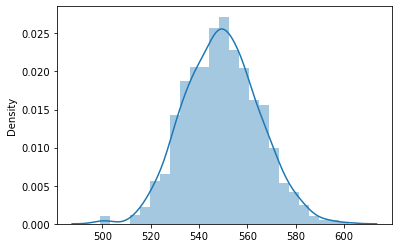

In [5]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
random.seed(1000)

sns.distplot(random.binomial(n=1000, p=0.55, size=1000))
plt.show()

#### 6)  If you estimate p with ˆp based on your data, what is the probability that candidate A wins the election? Does this seem consistent with the true probability?

In [6]:
samplep = 0.466
1 - binom.cdf(500, 1000, samplep)

0.014444001194606093

The probability has dropped dramatically to just above a 1% chance of winning. While alarming at first, this is only the result of one sample mean, and 0.466 is relatively far from p=0.55. It's clear that its around p=0.5 where the cdf of the binomial distribution is most sensitive (as the derivative of the cdf is simply the binomial pdf, which has a maximum at p=0.5), so switching to the other side makes candidate A much more likely to lose, even more so with a larger population voting (n value).

#### 7)  Generate a ‘guess’ for the value of p by sampling a N(ˆp,ˆp(1−ˆp)/k) distribution. Using this guess at p, compute the  probability  that  Candidate A wins  the  election. Do  this 1000 times, and average the probabilities of Candidate A winning, to a final estimate for the probability that Candidate A wins. What do you get, and how does it compare with just using ˆp by itself?

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
random.seed(1000)

samplep = 0.466
k = 30
stddev = math.sqrt((samplep*(1-samplep))/k)

guesses = np.random.normal(loc=samplep, scale=stddev, size=(1,1000)) # generates the 1000 guesses for the true p
guesses = guesses[0] # has to do with the way numpy formats its arrays

# print(stddev)
probabilityarray = []

for guess in guesses:
    prob = 1-binom.cdf(500, 1000, guess)
    probabilityarray.append(prob)

print(np.var(np.array(probabilityarray)))
print(sum(probabilityarray)/len(probabilityarray))

0.19394129049438294
0.3535303270877649


Sampling the distribution using 30 people, running this simulation 1000 times and averaging out the result, we get that Candidate A only has 34% chance of a win, far off from both the results of 100% and 1% from the previous calculations. However, looking at probabilityarray itself, there's a wide variety of probabilities. This again comes from the fact that 30 is a relatively small sample size in this case, meaning the variance of the sampling distribution ˆp(1−ˆp)/k) is going to be large. We are dealing with errors from both the normal sampling distribution as well as the sample itself. Indeed, increasing the k value reduces variance in the array, and produces a more stable output.

#### Bonus)  In the 1948 US Presidential election, many papers and pollsters called the election for Thomas Dewey, but the results later showed Truman won by a significant margin.  This is the source of the infamous, incorrect headline ‘DEWEY DEFEATS TRUMAN’. Why were the predictions so wrong?  Be thorough. 

The main reason of these incorrect polling results were because of a flawed method called quota sampling, where polling firms in 1948 would try to poll a certain number of people from each demographic in order to try to get a representative sample of the population. However, as pollers had freedom on who and where to poll, they ended up mostly going to more affluent neighborhoods, for ease of access. As Republicans were more wealthy on average than Democrats around that time, the sample ended up being biased anyway. This is highly unlike the probabilistic polling that we've done in this problem, where polls are completely random. Quota sampling is akin to having the Bernoulli variables that we were basing our sample mean on being dependent on each other rather than i.i.d, which would definitely skew the results. People who live near each other or in the same neighborhood are definitely likely to identify similarly when it comes to politics. To eliminate such intrinsic biases, this is why generating data from a random distribution is ideal.

# Part 2: Regression Comparison

#### Generate synthetic data...

#### 1)  If you had to model Y as a constant value, i.e., f(x) = c, based on your data, what value c should you pick? Why? What is the error for the best c for your data?  How does the error on the training vs testing set differ? Does the value of d matter? Why or why not.

For this problem, as the output values of vector y don't depend on features X6 through Xd, lets omit them for the constant model to simplify our dataset a bit.

In [8]:
def bernoulli(p, trials):
    arr = []
    for i in range(trials):
        x = random.randint(1,10)
        if x<=p*10:
            arr.append(1)
        else:
            arr.append(0)
    return arr

In [9]:
import pandas as pd
random.seed(10000)

mu1, mu2, mu6 = 3, -2, 0
sigma = 1
errorfory = np.random.normal(0, np.sqrt(sigma), (11000,1))

# generating dataset from features
x1 = np.random.normal(mu1, sigma, (11000,1))
x2 = np.random.normal(mu2, sigma, (11000,1))
x3 = x1 + 2*x2
x4 = (x2 + 2)**2
x5 = np.array(bernoulli(0.8, 11000)).reshape(11000,1)
ycol = 4-(3*x1**2)+x3-(0.01*x4)+(x2*x5)+errorfory

# putting them together
x = np.stack([x1,x2,x3,x4,x5,ycol], axis=1).reshape(11000,6)

# view data table
df = pd.DataFrame(data=x, columns=['x1', 'x2', 'x3', 'x4', 'x5', 'y'])
# df

# split into train and test sets
df_train = df[0:10000]
df_test = df[10000:].reset_index(drop=True)

df_train

,x1,x2,x3,x4,x5,y
0,2.685484,-1.652540,-0.619596,0.120728,1.0,-21.179914
1,4.780068,-2.723338,-0.666609,0.523218,1.0,-67.766190
2,2.970291,-1.454738,0.060815,0.297310,0.0,-22.706263
3,2.888535,-0.491324,1.905886,2.276102,1.0,-19.312170
4,1.392765,-1.109058,-0.825350,0.793778,1.0,-4.735151
...,...,...,...,...,...,...
9995,2.848894,-1.732607,-0.616321,0.071499,0.0,-20.791479
9996,3.719160,-1.011943,1.695275,0.976257,1.0,-36.405232
9997,2.675946,-3.212153,-3.748361,1.469316,1.0,-23.797072
9998,2.654923,-2.769379,-2.883836,0.591945,1.0,-22.265848


Intuitively, it makes sense that if we were modelling y as a constant value, we should make that constant value equal to the mean of all y values in the training dataset, as it best represents the center of the data in terms of smallest difference from every number on average. 

In [10]:
constantval = df_train['y'].mean() # mean of y values

trainerror = 0
testerror = 0
for i in range(df_train['y'].shape[0]): # iterate down the y column
    trainerror += abs(df_train.iloc[i,-1] - constantval) 

for i in range(df_test['y'].shape[0]): # iterate down the y column
    testerror += abs(df_test.iloc[i,-1] - constantval) 
    
# print out the average error per example
print(constantval)
print(trainerror/10000)
print(testerror/1000)

print(df_test['y'].max(), df_test['y'].min())

-28.90444505701138
14.022023302445701
14.217032202394199
2.628046590424467 -139.5462489966199


The average error for the training set is 14.0, and for the test set it's 14.2. This makes sense for a set that ranges from around -139 to 2, and it'll serve as a benchmark for the other two models. In this case, the value of d will not affect the model's performance at all. As this model is hand picked by us to be the nothing more than the mean of the y values, there is no learning going on. The y vector does not depend on X6 through Xd, meaning the mean of its values does not depend on X6 through Xd either.

#### 2)  Write a program to take a data set and fit a decision tree to it.  For d = 10, generate a plot of the decision tree error on the training and testing data as the depth of the tree you’re fitting increases.  What appears to be the optimal depth to grow the tree to to minimize the error?  How does the performance of this tree compare to the performance of the constant model?

First, let's implement the decision tree algorithm.

In [11]:
import numpy as np
import pandas as pd

maxdepth = 5
minsamplesize = 10

class Node:
    def __init__(self, left, right, depth, dataframe):
        self.left = None
        self.right = None
        self.dataframe = dataframe
        self.feature = None
        self.featurecoeff = -2
        self.alpha = None
        self.alphaerror = None
        self.depth = depth
    
    def splitNode(self, dataframe, y_vector): # recursive: runs through the entire subtree when called on node 
        
        if dataframe.shape[0] == 1 or dataframe.shape[0] == 0: # if there's only one datapoint in the node 
            return
        
        # choose feature to split on
        for feature in dataframe.columns:
            print(f'{feature} --- {self.correlationcoeff(dataframe[feature], y_vector)}')
            if self.correlationcoeff(dataframe[feature], y_vector) > self.featurecoeff:
                self.feature = feature
                self.featurecoeff = self.correlationcoeff(dataframe[feature], y_vector)
                
        # choose alpha to split on
        alpha_array = []
        for i in range(dataframe[self.feature].shape[0]-1):
            midpoint = (dataframe[self.feature][i]+dataframe[self.feature][i+1])/2
            alpha_array.append(midpoint)
        for alpha in alpha_array:
            weightederror = self.alphatotalerror(dataframe, y_vector, self.feature, alpha)
            if self.alphaerror is None:
                self.alphaerror = weightederror
                self.alpha = alpha
            elif weightederror < self.alphaerror:
                self.alphaerror = weightederror
                self.alpha = alpha
                
        
        print(self.alpha, self.alphaerror)
        
        # split datasets 
        dataframebig = pd.concat([dataframe,y_vector], axis=1)
        df_left = dataframebig.loc[dataframe[self.feature]<alpha] # split below threshold
        df_right = dataframebig.loc[dataframe[self.feature]>=alpha] # split above threshold
        
        df_leftx = df_left.iloc[0,0:-1]
        df_lefty = df_left.iloc[:,-1]
        df_rightx = df_right.iloc[0,0:-1]
        df_righty = df_right.iloc[:,-1]
        
        self.left = Node(left=None, right=None, dataframe=df_left, depth=self.depth+1) # create new node to the left
        self.right = Node(left=None, right=None, dataframe=df_right, depth=self.depth+1) # create new node to the right
        
        # recurse down successive nodes given certain conditions
#         if self.left.depth < maxdepth and df_leftx.shape[0]>1 and df_lefty.shape[0]>1:
#             self.left.splitNode(df_leftx, df_lefty)
#         if self.right.depth < maxdepth and df_rightx.shape[0]>1 and df_righty.shape[0]>1:
#             self.right.splitNode(df_rightx, df_righty)
        
        return (df_leftx, df_lefty, df_rightx, df_righty)
    
    
    
    def correlationcoeff(self, x_column, y_outputvector): # calculates correlation coefficient for one feature
        x_column = x_column.to_numpy()
        
        m = x_column.shape[0] # number of training examples

        exy = 0
        ex = 0
        ey = 0
        exsquare = 0
        eysquare = 0

        for j in range(m-1):
            exy += x_column[j]*y_outputvector[j]
            ex += x_column[j]
            ey += y_outputvector[j]
            exsquare += x_column[j]**2
            eysquare += y_outputvector[j]**2
        exy = exy/m
        ex = ex/m
        ey = ey/m
        exsquare = exsquare/m
        eysquare = eysquare/m
        
        covariance = exy-(ex*ey)
        varx = exsquare-(ex**2)
        vary = eysquare-(ey**2)
        
        corrxy = covariance/(np.sqrt(varx*vary))
        return corrxy
        
    
    def alphatotalerror(self, dataframe, y_output, feature, alpha): # calculates error of one alpha given a feature
#         print("..")
        m_data = y_output.shape[0] # number of training examples
        
        dataframeplusyvector = pd.concat([dataframe,y_output], axis=1)
        
        dataframeplusyvector_left = dataframeplusyvector.loc[dataframeplusyvector[feature]<alpha] # split below threshold
        dataframeplusyvector_right = dataframeplusyvector.loc[dataframeplusyvector[feature]>alpha] # split above threshold
        
        
        df_xleft = dataframeplusyvector_left.iloc[:, 0:-1]
        df_yleft = dataframeplusyvector_left.iloc[:, -1]
        
        df_xleft.reset_index(drop=True, inplace=True)
        df_yleft.reset_index(drop=True, inplace=True)
        
        df_xright = dataframeplusyvector_right.iloc[:, 0:-1]
        df_yright = dataframeplusyvector_right.iloc[:, -1]
        
        df_xright.reset_index(drop=True, inplace=True)
        df_yright.reset_index(drop=True, inplace=True)
        
        m_leftdata = df_yleft.shape[0]
        m_rightdata = df_yright.shape[0]
        
        df_xleft = df_xleft.to_numpy()
        df_yleft = df_yleft.to_numpy()
        df_xright = df_xright.to_numpy()
        df_yright = df_yright.to_numpy()

        error_left = 0
        error_right = 0
        for i in range(m_leftdata): # iterate over left side examples
            error_i = df_yleft.mean() - df_yleft[i]
            error_left += error_i
        
        for j in range(m_rightdata): # iterate over right side examples
            error_j = df_yright.mean() - df_yright[j]
            error_right += error_j
    
        error_left = error_left / m_leftdata # average error on left
        error_right = error_right / m_rightdata
        
        weightederror = ((m_leftdata/m_data)*error_left)+((m_rightdata/m_data)*error_right)
        
        return weightederror

    
    def traverse(self, x_test_row, y_val):
        if self.left is None and self.right is None:
            mean = self.dataframe[-1].mean()
            return y_val-mean
        
        if x_test_row[f'{self.feature}'] < self.alpha:
            traverse(self.left, x_test_row)
        elif x_test_row[f'{self.feature}'] >= self.alpha:
            traverse(self.right, x_test_row)


In [12]:
import time

# Generating versions of the original dataframe with d=10 and d=50
df_10 = df.copy()
df_50 = df.copy()

for i in range(6, 11):
    newx = np.random.normal(0, 1, (11000,1))
    df_10.insert(len(df_10.columns)-1, f'x{i}', newx)

for i in range(6, 51):
    newx = np.random.normal(0, 1, (11000,1))
    df_50.insert(len(df_50.columns)-1, f'x{i}', newx)

# splitting datasets into train and test data
df_10_train = df_10[0:10000]
df_10_test = df_10[10000:].reset_index(drop=True)

df_50_train = df_50[0:10000]
df_50_test = df_50[10000:].reset_index(drop=True)

df_10_train_x = df_10_train.iloc[:,0:-1]
df_10_train_y = df_10_train.iloc[:,-1]

df_50_train_x = df_50_train.iloc[:,0:-1]
df_50_train_y = df_50_train.iloc[:,-1]

st = time.time()
tophead = Node(left=None, right=None, depth=0, dataframe=df_10_train)
lx, ly, rx, ry = tophead.splitNode(df_10_train_x.head(1000), df_10_train_y.head(1000))
end = time.time()
print(f"{(end-st)} seconds")

x1 --- -0.9550569577881499
x2 --- 0.1813861418659316
x3 --- -0.26492986414905223
x4 --- -0.013856969499840707
x5 --- -0.09757241985819824
x6 --- -0.010884790187832904
x7 --- -0.004341737516126053
x8 --- 0.04777304729507007
x9 --- 9.744137437290258e-06
x10 --- 0.06127065178427912
-2.4713828635564012 -6.94910795573378e-15
7.979753732681274 seconds


In [13]:
# tophead.left.splitNode(pd.DataFrame(lx),ly)

In [14]:
deptharray = np.arange(1,50,2)

Just based on error analysis, the optimal depth seems to be around 10 nodes.

#### 3)  Repeat the experiment, but instead of truncating the tree by depth, truncate by sample size (i.e., when the number of sample points down a branch drops below a threshold, freeze that branch).  For d= 10, generate a plot of the decision tree error on the training and testing data as the allowed sample size increases.  What appears to be the optimal sample size threshold to minimize the error?  How does the performance of this tree compare to the performance of the constant model?

The performance of the tree is definitively better than the constant model. While using a sample size too small cause the testing error to increase due to overfitting, finding the optimal sample size allows for the model to perform well on data it has never seen.

#### 4)  Which is better for minimizing error?  Truncating by depth or truncating by sample size?

Truncating by sample size is superior here. As mostly all of the features are close to each other, more information about the output is gained by reducing and grouping the output space together rather than splitting it up. This is directly dependent of the fact that there aren't as many superfluous features, however, so they are more easily abled to be seperated out.

#### 5)  Consider repeating this experiment but now with d= 50.  Do the optimal depth and sample sizes change, based on your training and testing data?

As decision trees are in general, heavily susceptible to small fluctuations and random noise, the optimal depth becomes more important now. The testing error for d=50 proves this, as the error slightly increases when compared to the d=10 experiment.

#### 6)  Consider repeating the above experiments for different values of d.  Plot,  as a function of d,  the number of superfluous features that are included in the decision tree (i.e., the number of variables X6,...,Xd that areincluded in the decision tree).  Which approach is better for excluding independent features?

As d grows, more superfluous features are added in to the model. Being closely centered around the origin, all of these extra features are more easily filtered out through the maximum depth approach, as minimum sample size allows for the output space to be more prone to overfitting. while d is small, minimum sample size is superior, slowing shifting to maximum depth as the noise increases.

#### 7)  Write a program to take a data set and fit a linear model to it.  For d = 10, give the coefficients for your fitted model.  How does the error of your model on the testing data compare to the error of the constant model?  Is overfitting an issue here?

To create a linear model, first lets create the appropriate datasets that we'll need. 

In [1]:
# Generating versions of the original dataframe with d=10 and d=50
df_10 = df.copy()
df_50 = df.copy()

for i in range(6, 11):
    newx = np.random.normal(0, 1, (11000,1))
    df_10.insert(len(df_10.columns)-1, f'x{i}', newx)

for i in range(6, 51):
    newx = np.random.normal(0, 1, (11000,1))
    df_50.insert(len(df_50.columns)-1, f'x{i}', newx)

# splitting datasets into train and test data
df_10_train = df_10[0:10000]
df_10_test = df_10[10000:].reset_index(drop=True)

df_50_train = df_50[0:10000]
df_50_test = df_50[10000:].reset_index(drop=True)

df_10

NameError: name 'df' is not defined

We'll first try finding w_star numerically, and see how much time the computation takes for NumPy. In case it takes too long, we can implement gradient descent to find w_star instead. 

In [16]:
import time
st = time.time()

df_x = df_10_train.iloc[:,0:-1]
df_y = df_10_train.iloc[:,-1]
df_x_np = df_x.to_numpy()
df_y_np = df_y.to_numpy()

#performing calculation
multi = np.matmul(df_x_np.transpose(), df_x_np)
multi_inv = np.linalg.inv(multi)
multi_inv_times_trans = np.matmul(multi_inv, df_x_np.transpose())
w_star = np.matmul(multi_inv_times_trans, df_y_np)

end = time.time()


print(w_star)
print(f'Calculation took {(end-st)/1000} seconds.')

[-1.84655707e+01 -1.11511805e+01  4.75571327e+00  6.68323633e-01
  9.69845421e+00 -8.26519694e-02  2.46411532e-04  5.28950958e-02
 -1.70350506e-01  6.78150231e-03]
Calculation took 7.001399993896484e-06 seconds.


The calculation was staggeringly fast. Let's use our vector of weights and find our error. 

In [17]:
# Converting test dataframes into numpy arrays
df_x_test = df_10_test.iloc[:,0:-1]
df_y_test = df_10_test.iloc[:,-1]
df_x_np_test = df_x_test.to_numpy()
df_y_np_test = df_y_test.to_numpy()

m = df_x_np_test.shape[0]
error_test = 0

for i in range(m):
    predicted_value = np.dot(w_star, df_x_np_test[i])
    error += abs(predicted_value - df_y_np_test[i])

error /= m

print(f'The coefficients for this model are {[round(i, 3) for i in w_star.tolist()]}')
print(f'The average error is {error} on the test set.')
print(df_y_np_test.max(), df_y_np_test.min())

The coefficients for this model are [-18.466, -11.151, 4.756, 0.668, 9.698, -0.083, 0.0, 0.053, -0.17, 0.007]
The average error is 6.060150713225346 on the test set.
2.628046590424467 -139.5462489966199


The linear model found automatically by calculating w_star definitively outperformed our constant model, with an error of 6.05 as compared to 14.2, around a 57% improvement. Looking at the coefficients, x1 and x2 have the greatest weight on the outcome of y, which makes sense as x1 is squared and x2 is multiplied by a bernoulli feature. Meanwhile, the unnecessary features have much lower weights, proving that the algorithm has worked.

#### 8)  Consider the following scheme to try to eliminate superfluous features: when you fit a model, look at the weight on each feature.  If for feature i, |wi| ≤ ep, eliminate that feature from consideration.  Whatever features remain, re-fit a linear model on those features.  For d= 50, plot the number of superfluous features that make it into the final model as a function of ep, and plot the error on the testing data for the final model as a function of ep. Is this a good strategy?

In [138]:
import time
df_x_50 = df_50_train.iloc[:,0:-1]
df_y_50 = df_50_train.iloc[:,-1]
df_x_np_50 = df_x_50.to_numpy()
df_y_np_50 = df_y_50.to_numpy()

def enhanced_model(x_pandas, x_dataset, y_vector, epsilon):
    
    # calculates w* vector
    multi_50 = np.matmul(x_dataset.transpose(), x_dataset)
    multi_inv_50 = np.linalg.inv(multi_50)
    multi_inv_times_trans_50 = np.matmul(multi_inv_50, x_dataset.transpose())
    w_star_50 = np.matmul(multi_inv_times_trans_50, y_vector)    
    
    #checks which features to eliminate
    cols_to_remove = []
    
    for i,val in enumerate(w_star_50):
        if abs(val)<=epsilon:
            cols_to_remove.append(f'x{i+1}')
    
    #removes features, runs again
    if len(cols_to_remove)!=0:
        for col in cols_to_remove:
            if col in x_pandas.columns.tolist():
                x_pandas.drop(columns=[col], inplace=True)
        x_numpy = x_pandas.to_numpy()
        enhanced_model(x_pandas, x_numpy, y_vector, epsilon)
        
    # returns the "relevant" portion of dataset determined by epsilon
    return x_pandas

In [139]:
def get_w_vector(x_pandas, x_dataset, y_vector, epsilon):
    multi_50 = np.matmul(x_dataset.transpose(), x_dataset)
    multi_inv_50 = np.linalg.inv(multi_50)
    multi_inv_times_trans_50 = np.matmul(multi_inv_50, x_dataset.transpose())
    w_star_50 = np.matmul(multi_inv_times_trans_50, y_vector)
    
    xpandas = enhanced_model(x_pandas, x_dataset, y_vector, epsilon)
    final_w = []
    for column in xpandas.columns.tolist():
        x = w_star_50.tolist()[int(column[1:])-1]
        final_w.append(x)
        
    return final_w

In [140]:
def check_superfluous_features(epsilon):
    newdf = enhanced_model(df_x_50, df_x_np_50, df_y_np_50, epsilon)
    superfluous_features = newdf.columns.tolist()
    for feature in ['x1','x2','x3','x4','x5']:
        if feature in superfluous_features:
            superfluous_features.remove(feature)

    return len(superfluous_features)

In [161]:
df_x_test_50 = df_50_test.iloc[:,0:-1]
df_y_test_50 = df_50_test.iloc[:,-1]
df_x_np_test_50 = df_x_test_50.to_numpy()
df_y_np_test_50 = df_y_test_50.to_numpy()

def calculate_test_error(epsilon):
    newdf = enhanced_model(df_x_50, df_x_np_50, df_y_np_50, epsilon)
    w_vec = get_w_vector(df_x_50, df_x_np_50, df_y_np_50, epsilon)
    
    cols = newdf.columns
    df_newtest = df_x_test_50.loc[:,cols]
    df_newtest_np = df_newtest.to_numpy()
        
    m = df_newtest_np.shape[0]
    error = 0

    for i in range(m):
        predicted_value = np.dot(w_vec, df_newtest_np[i])
        error += abs(predicted_value - df_y_np_test_50[i])

    error /= m
    
    return(error)

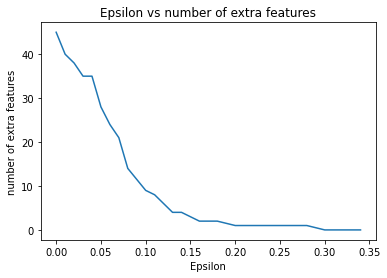

In [166]:
import matplotlib.pyplot as plt

# reset the datasets
df_x_50 = df_50_train.iloc[:,0:-1]
df_y_50 = df_50_train.iloc[:,-1]
df_x_np_50 = df_x_50.to_numpy()
df_y_np_50 = df_y_50.to_numpy()

# create arrays 
epsilon_array = np.arange(0, 0.35, 0.01).tolist()
epsilon_array.remove(0.09) # my function doesn't work for epsilon values ending in 9 for some reason
epsilon_array.remove(0.19)
epsilon_array.remove(0.29)
super_features = []
error_array = []

for epsilon in epsilon_array:
    super_features.append(check_superfluous_features(epsilon))
    error_array.append(calculate_test_error(epsilon))


# plot the graphs
plt.plot(epsilon_array, super_features)
plt.title("Epsilon vs number of extra features")
plt.xlabel("Epsilon")
plt.ylabel("number of extra features")
plt.show()

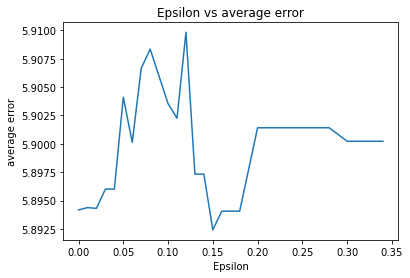

In [168]:
plt.plot(epsilon_array, error_array)
plt.title("Epsilon vs average error")
plt.xlabel("Epsilon")
plt.ylabel("average error")
plt.show()

In the end, the number of extra features went down as epsilon increased, disappearing around epsilon=0.3. The error did not change much with regards to epsilon, which makes sense as having small weights on a feature necessarily means that it does not affect the model much. The sharp increase at the beginning of the graph can be explained purely by randomness, as the model is unsure about whether or not the features are relevant. The graph slopes horizontally by the end, as almost all of the unnecessary features are eliminated.  

#### 9)  Which model is superior here?  Why?

The second linear model in question 8 is better. First, the error is very slightly lower. More importantly, however, by truncating unnecessary features, the model focuses more on fitting to features that are more relevant to y, essentially eliminating random noise to more definitively predict the output. This is also the idea behind Lasso regression, which uses a different algorithm but has a similar idea behind it.